# Dijkstras Annulus Coreset
This code is used to demonstrate the coreset method on some simple datasets. 

In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

import graphlearning as gl
import graphlearning.active_learning as al

import batch_active_learning as bal

## Separated Blobs
Demonstrates the DAC algorithm when it needs to randomly jump. 

In [2]:
num_points = 300
X = np.random.uniform(size=(2 * num_points, 2))
X[num_points:, 0] += 2
labels = np.zeros(2 * num_points, dtype=int)

In [3]:
W = gl.weightmatrix.knn(X,10)
G = gl.graph(W)
train_ind = []

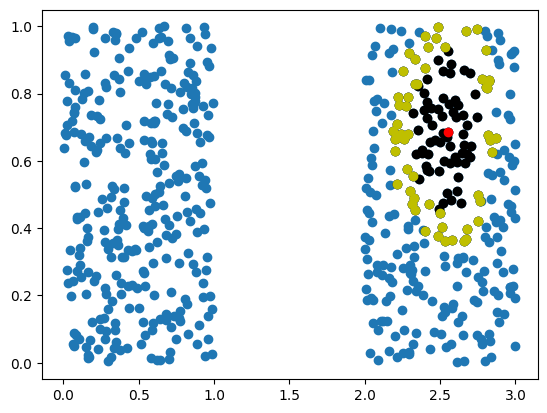

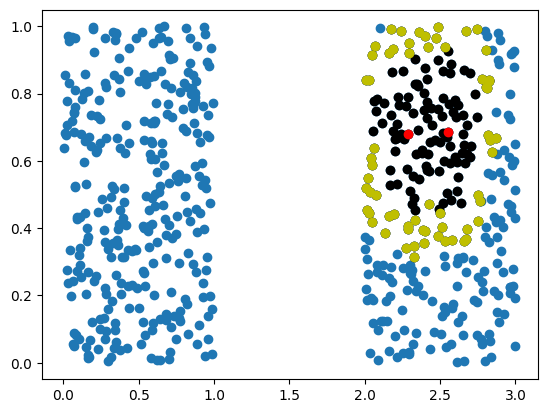

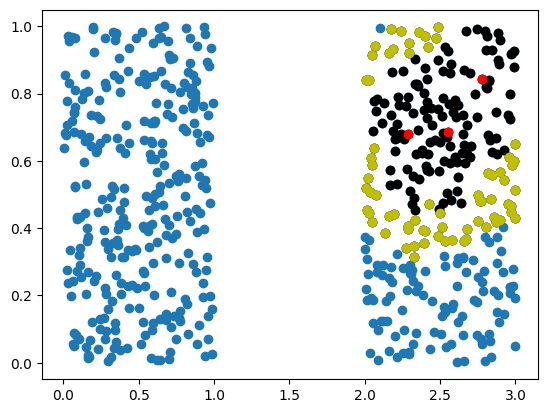

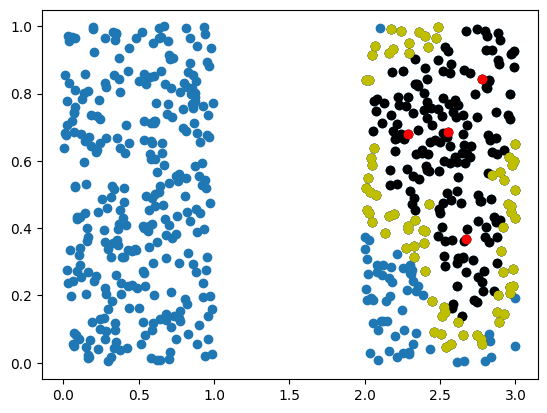

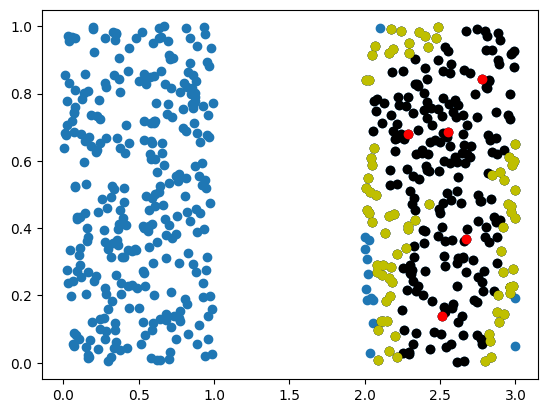

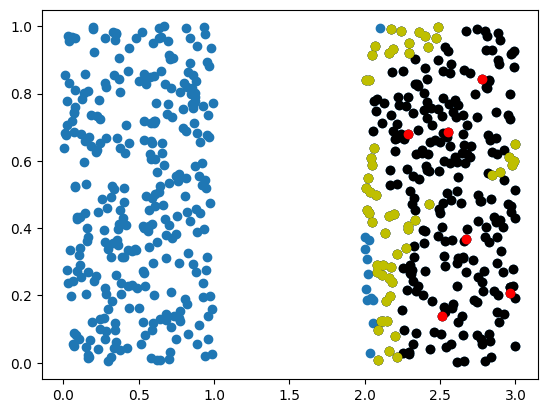

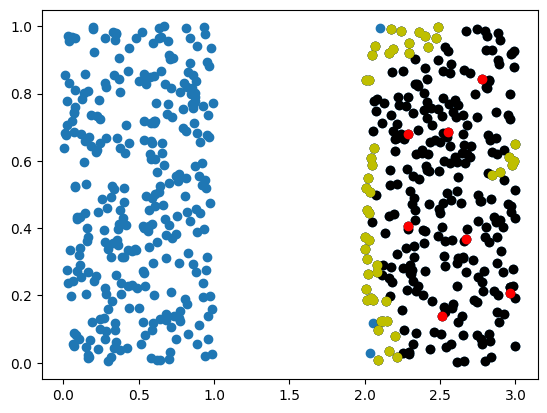

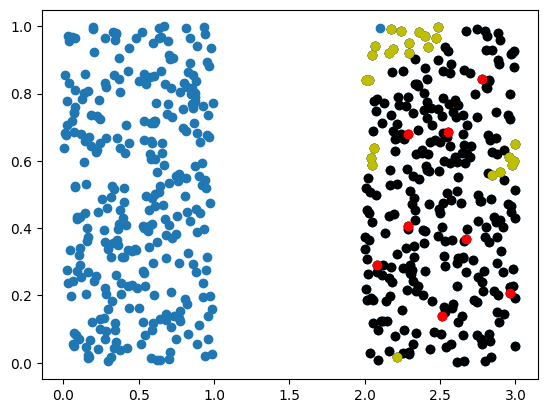

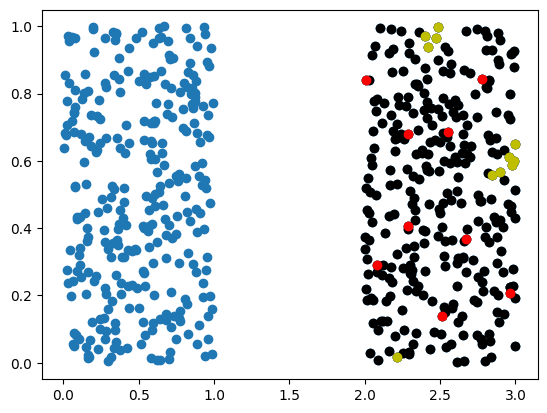

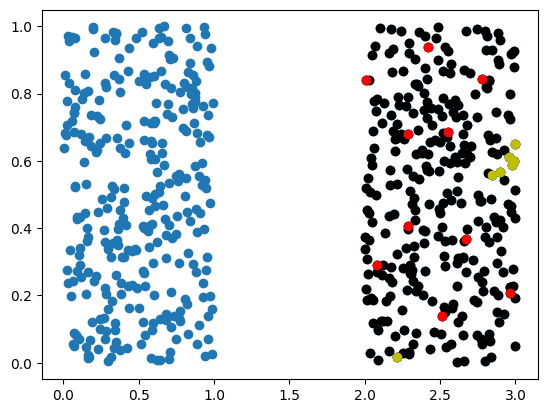

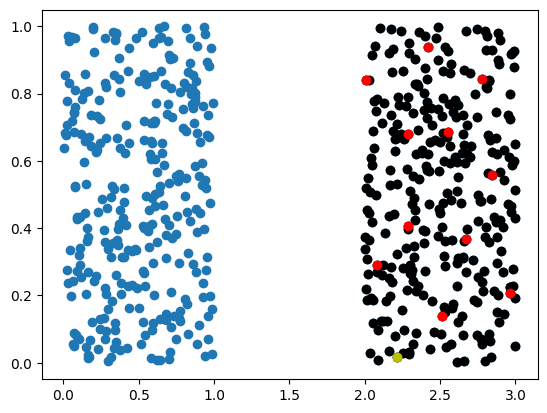

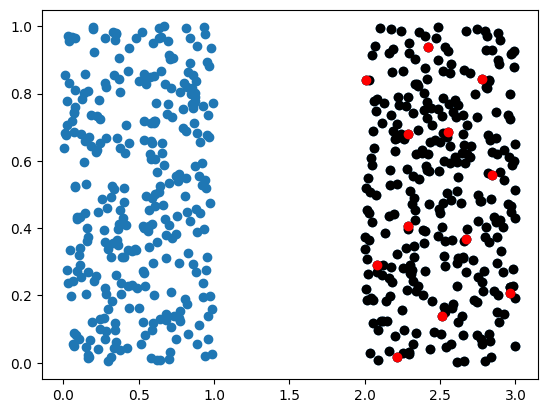

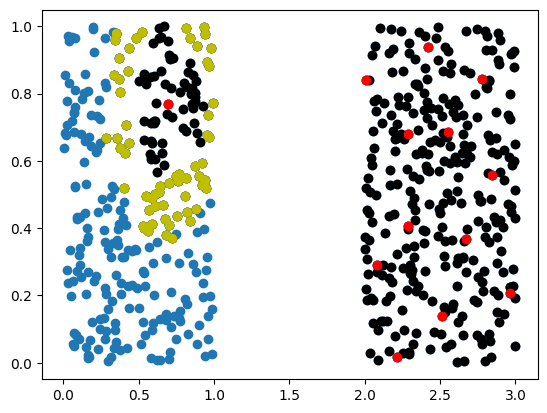

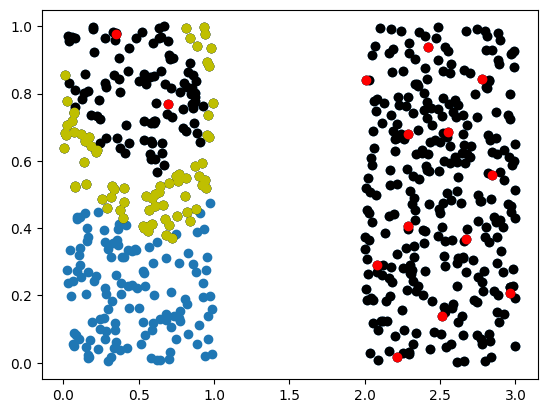

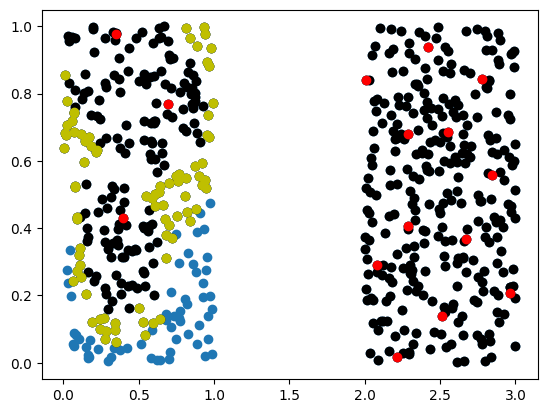

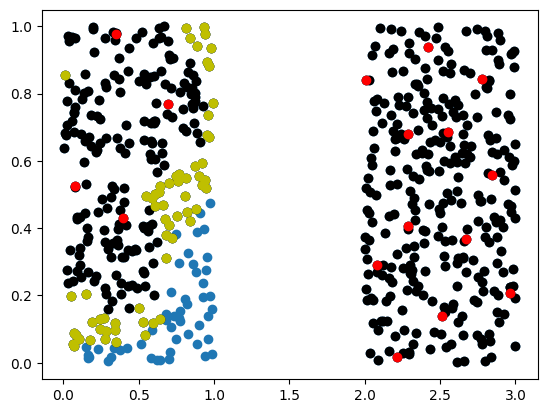

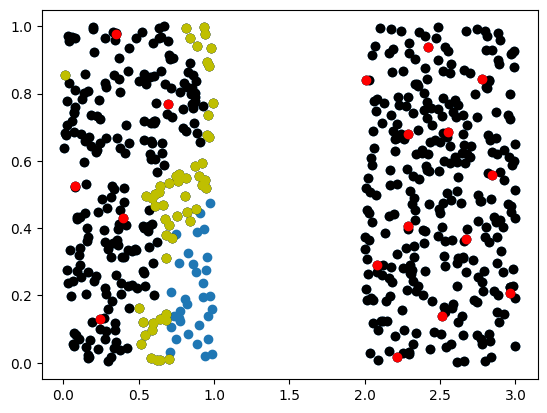

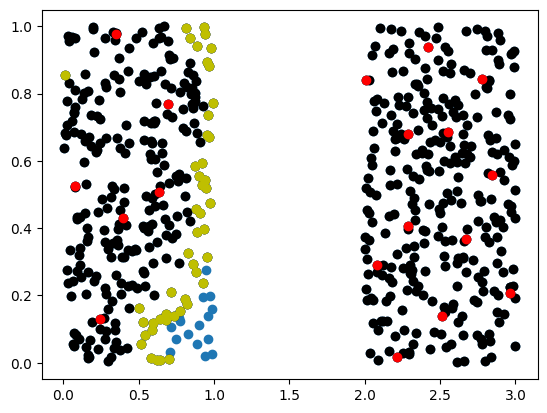

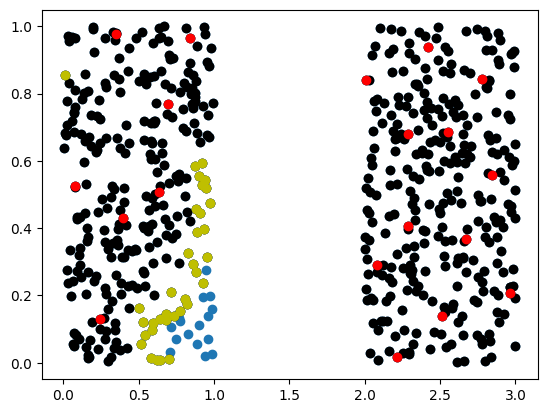

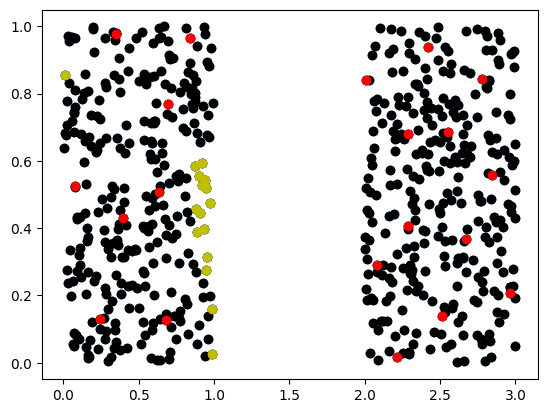

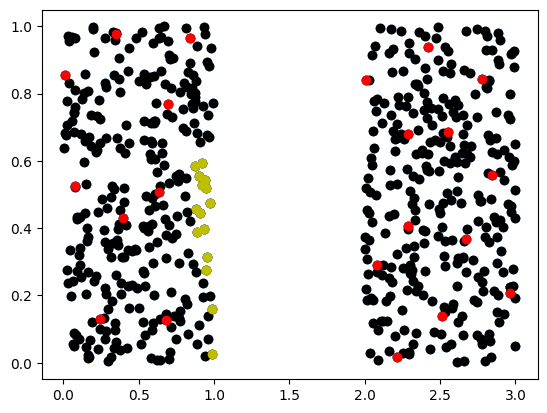

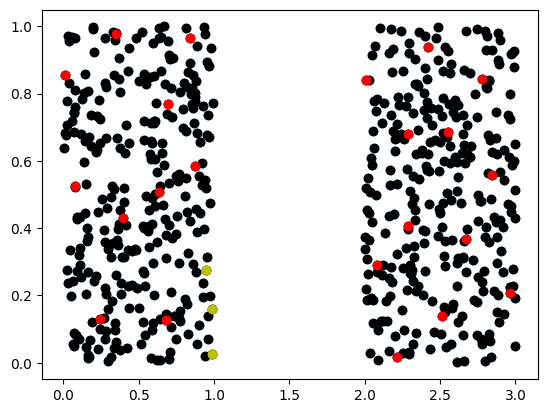

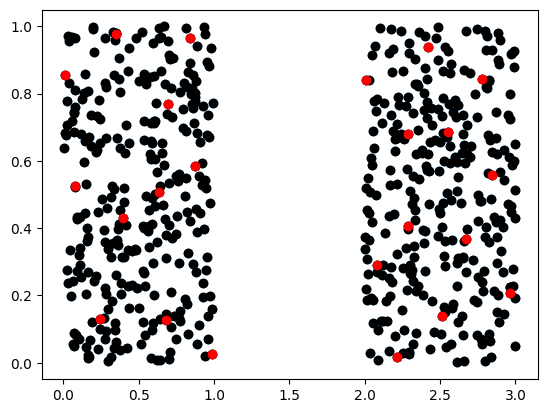

Coreset =  [510, 534, 331, 581, 390, 366, 317, 369, 424, 351, 433, 511, 253, 164, 190, 128, 289, 27, 49, 297, 212, 104, 139]


In [4]:
coreset = bal.coreset_dijkstras(G, .5, data = X, density_info = (True, .2, 1.0), initial=list(train_ind), DEBUGGING=True);
print("Coreset = ", coreset)

## Spatial Radius vs Density Radius
This example demonstrates the difference between the spatial radius and density radius in DAC. The spatial radius will use fixed size annuli. The density radius will adapt the radius depending on the density of the region. 

In [5]:
num_points = 200
X = np.random.uniform(size=(11 * num_points, 2))
X[num_points:, 0] += 2
labels = np.zeros(11 * num_points, dtype=int)

W = gl.weightmatrix.knn(X,10)
G = gl.graph(W)
train_ind = []

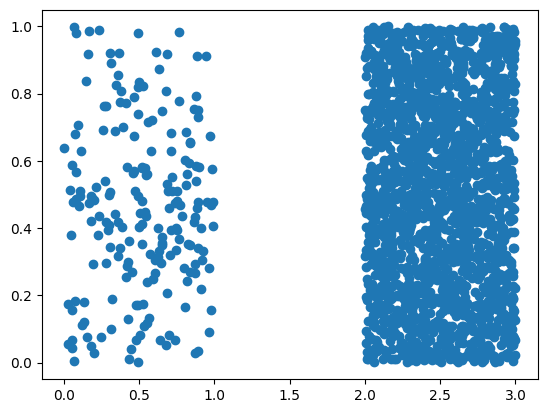

In [6]:
plt.scatter(X[:, 0], X[:, 1]);
plt.show()

In [7]:
coreset = bal.coreset_dijkstras(G, .5, data = X, density_info = (False, .25, 1.0), initial=list(train_ind), DEBUGGING=False);
print("Coreset = ", coreset)

Coreset =  [1346, 513, 303, 616, 1686, 468, 2036, 875, 1645, 2140, 594, 1557, 783, 408, 174, 57, 36, 34, 123, 145, 79, 176, 20, 15, 132, 17, 175, 63]


In [8]:
coreset = bal.coreset_dijkstras(G, .5, data = X, density_info = (True, .25, 1.0), initial=list(train_ind), DEBUGGING=False);
print("Coreset = ", coreset)

KeyboardInterrupt: 

## Uniform Square dataset

In [ ]:
#Used in the paper diagram
np.random.seed(0)

num_points = 1000
X = np.random.uniform(size = (num_points, 2))
W = gl.weightmatrix.knn(X, 20, kernel = 'distance')
G = gl.graph(W)
train_ind = []

In [ ]:
coreset = bal.coreset_dijkstras(G, .5, data = X, density_info = (True, .4, 1.0), initial=list(train_ind), DEBUGGING=True);
print("Coreset = ", coreset)